In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
df = pd.read_csv("./data/gurgaon_properties_cleaned_v2.csv")
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [201]:
# some data is duplicate
df.duplicated().sum()

126

In [202]:
# drop duplicate values as its not much
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3677 non-null   object 
 1   society              3676 non-null   object 
 2   sector               3677 non-null   object 
 3   price                3660 non-null   float64
 4   price_per_sqft       3660 non-null   float64
 5   area                 3660 non-null   float64
 6   areaWithType         3677 non-null   object 
 7   bedRoom              3677 non-null   int64  
 8   bathroom             3677 non-null   int64  
 9   balcony              3677 non-null   object 
 10  floorNum             3658 non-null   float64
 11  facing               2632 non-null   object 
 12  agePossession        3677 non-null   object 
 13  super_built_up_area  1875 non-null   float64
 14  built_up_area        1690 non-null   float64
 15  carpet_area          1872 non-null   f

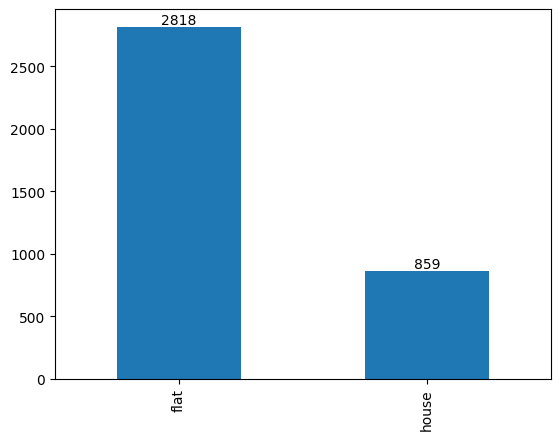

In [204]:
ax = df['property_type'].value_counts().plot(kind='bar')
for index, value in enumerate(df['property_type'].value_counts().values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

In [205]:
df['property_type'].value_counts() / df['property_type'].shape* 100

flat     76.638564
house    23.361436
Name: property_type, dtype: float64

Observations:
    About 76% values are flats and 
    23% are independent houses

In [206]:
df['society'].value_counts()

independent                               486
tulip violet                               75
ss the leaf                                73
dlf new town heights                       42
shapoorji pallonji joyville gurugram       42
                                         ... 
dlf gardencity enclave                      1
nitin vihar                                 1
landmark the residency                      1
kw royal court                              1
surendra homes dayaindependentd colony      1
Name: society, Length: 676, dtype: int64

In [207]:
df['society'].value_counts().shape
#df.shape

(676,)

In [208]:
# NaN value in society name should not have any significant impact on oir analysis
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2693,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,0,0


In [209]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

tulip violet                            0.023511
ss the leaf                             0.046395
shapoorji pallonji joyville gurugram    0.059561
dlf new town heights                    0.072727
signature global park                   0.083699
                                          ...   
ramsons kshitij                         0.490282
umang monsoon breeze                    0.494357
ats kocoon                              0.498433
ireo the corridors                      0.502194
central park flower valley              0.505956
Name: society, Length: 75, dtype: float64

In [210]:
society_counts = df['society'].value_counts()
availability_counts = {
    "Very High":(society_counts > 50).sum(),
    "High":((society_counts > 30) & (society_counts <= 50)).sum(),
    "Medium":((society_counts > 10) & (society_counts <= 30)).sum(),
    "Low":((society_counts > 5) & (society_counts <= 10)).sum(),
    "Very Low":((society_counts <= 5)).sum()
}
availability_counts

{'Very High': 3, 'High': 8, 'Medium': 78, 'Low': 67, 'Very Low': 520}

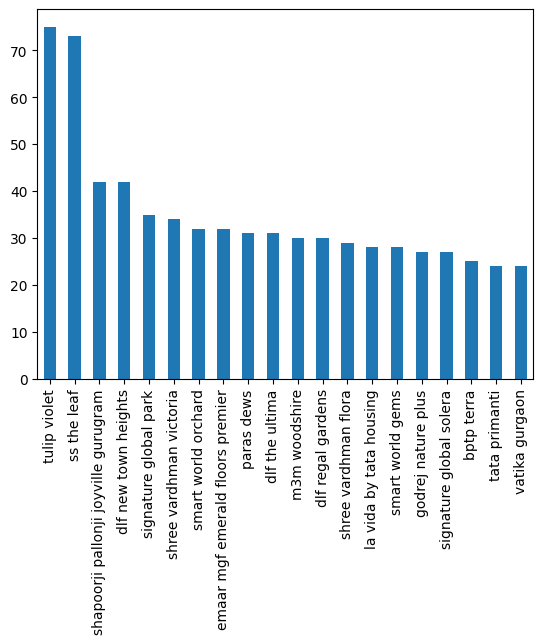

In [211]:
# top 20 socities for availability of flats
df[df['society'] != 'independent']['society'].value_counts().head(20).plot(kind='bar')
plt.show()

Observations:

1. We may keep or remove this society column
2. Availability in a society may be a good criteria. Create a feature for availability
    'Very High': 3,
    'High': 8,
    'Medium': 78,
    'Low': 67,
    'Very Low': 520
3. However, cardinality of this column is very high, hence it may not have much value for us
4. 50% flats are in just 74 socities out of 676 societies. It may have some utility for insight pupose
5. 13% properties are individual houses


# Sectors

In [212]:
df['sector'].value_counts().shape

(113,)

In [213]:
df['sector'].value_counts()

sohna road    154
sector 85     108
sector 102    107
sector 92     100
sector 69      93
             ... 
sector 73       3
sector 17a      3
sector 88b      3
sector 27       3
sector 37       1
Name: sector, Length: 113, dtype: int64

In [214]:
# all have sector / locality information
df[df['sector'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


In [215]:
# sector wise distribution of the properties 
sector_counts = df['sector'].value_counts()
availability_counts = {
    "Very High":(sector_counts > 50).sum(),
    "High":((sector_counts > 30) & (sector_counts <= 50)).sum(),
    "Medium":((sector_counts > 10) & (sector_counts <= 30)).sum(),
    "Low":((sector_counts > 5) & (sector_counts <= 10)).sum(),
    "Very Low":((sector_counts <= 5)).sum()
}
availability_counts

{'Very High': 26, 'High': 17, 'Medium': 45, 'Low': 17, 'Very Low': 8}

1. There are 113 unique sectors in the city
2. All records have sector information
3. Sectorial distribution of the availability properties:
    'Very High availability': 26,
    'High availability': 17,
    'Medium availability': 45,
    'Low availability': 17,
    'Very Low availability': 8

In [216]:
df['price'].isnull().sum()

17

In [217]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

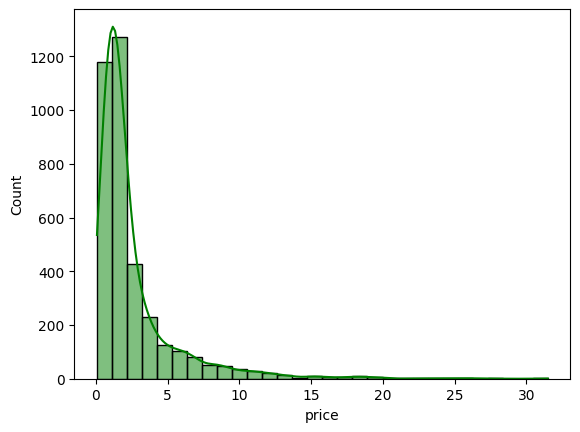

In [218]:
sns.histplot(df['price'], bins=30, kde=True, color='green')
plt.show()

count    843.000000
mean       5.275089
std        4.731039
min        0.070000
25%        1.475000
50%        4.250000
75%        7.500000
max       31.500000
Name: price, dtype: float64


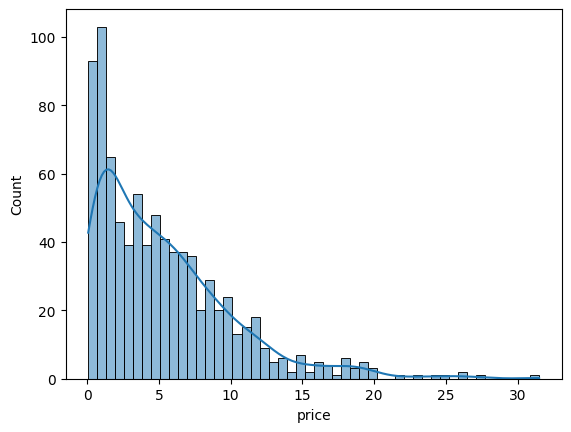

In [219]:
# Individual houses are much more costlier
# they are suppose to havee different distribution
print(df[df['property_type'] != 'flat']['price'].describe())
sns.histplot(df[df['property_type'] != 'flat']['price'], bins=50, kde=True)
plt.show()

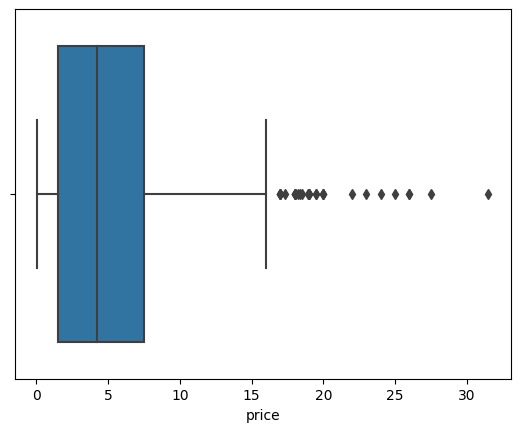

In [220]:
# for individual houses
sns.boxplot(x = df[df['property_type'] != 'flat']['price'])
plt.show()

count    2817.000000
mean        1.713280
std         1.388532
min         0.160000
25%         0.900000
50%         1.380000
75%         2.050000
max        15.000000
Name: price, dtype: float64


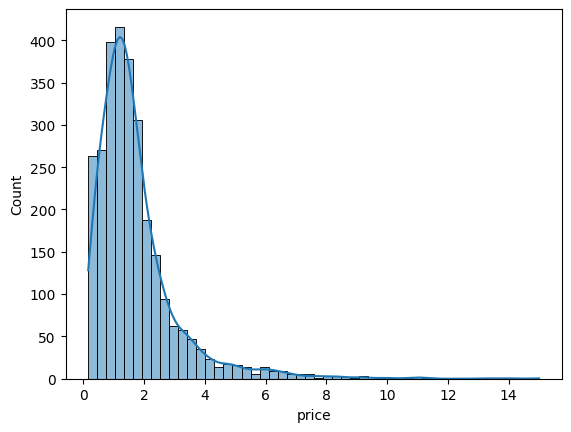

In [221]:
# flats distribution
print(df[df['property_type'] == 'flat']['price'].describe())
sns.histplot(df[df['property_type'] == 'flat']['price'], bins=50, kde=True)
plt.show()

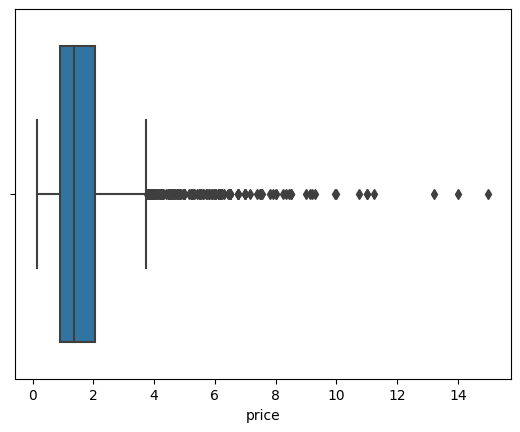

In [222]:
sns.boxplot(x = df[df['property_type'] == 'flat']['price'])
plt.show()

In [223]:
print("Skewness : ", df['price'].skew(), "\nKurtosis : ", df['price'].kurtosis())

Skewness :  3.2791704733134623 
Kurtosis :  14.933372629214258


In [224]:
# Quantile analysis
df['price'].quantile([0.01, 0.10, 0.50, 0.95])

0.01    0.25
0.10    0.50
0.50    1.52
0.95    8.50
Name: price, dtype: float64

In [225]:
IQR = df['price'].describe()['75%'] - df['price'].describe()['25%']
lower_bound = df['price'].describe()['25%'] - 1.5*IQR
upper_bound = df['price'].describe()['75%'] + 1.5*IQR
print("Lower Bound = ",lower_bound,"Cr.", "\nUpper Bound = ", upper_bound,"Cr.")

Lower Bound =  -1.7500000000000002 Cr. 
Upper Bound =  5.45 Cr.


Observations:

Descriptive Statistics:
1. 3660 non-null values having price out of 3667 entries
2. 7 hoises have null value in price
3. Median price is 1.52 Cr
4. Mean price is 2.53 Cr
5. High standard deviation/variation in price
6. Price ranges from 0.07 to 31.5 Cr
7. IQR 0.95 to 2.75 Cr
8. flats and individual houses have somewhat diferent distribution.
9. Independent house has higher price tag on it


Visualization:
10. Diistribution: Most properties are below 5 Cr range. Few are above 10 Cr.
11. BoxPlot: Price above 10 Cr can be considered outlier in the data.

12. 7 properties have missing values.

13. Skewness :  3.27 Right Skewed or Positive Skewed distribution. 
14. Curtosis :  14.93 so much greater than 3 means so much outliers in the dataset or Heavier tailed data.
15. 1% property below 0.25 Cr, 10% properties below 0.50 Cr, 50% properties below 1.52 Cr, 95% properties below 8.50 Cr.
16. 425 properties are outliers. All are in higher range (towards Upper Bound)

(425,)
count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64


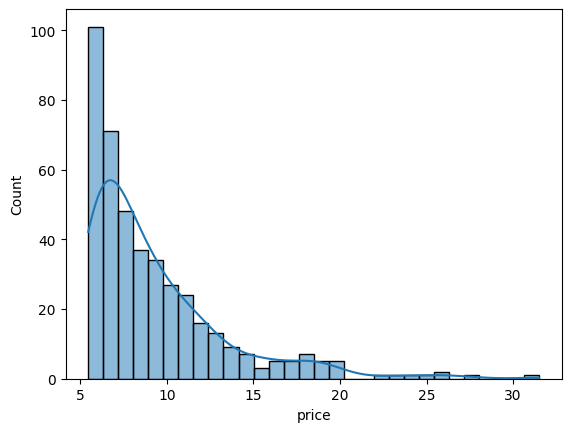

In [226]:
outliers = df[df['price'] > upper_bound]['price']
print(outliers.shape)
print(outliers.describe())
sns.histplot(x=outliers, bins=30, kde=True)
plt.show()

Analysis of Outliers:
1. Outliers have mean value 9.23 Cr.
2. Median Outliers have 8.0 Cr price
3. That is again right skewed
4. Some properties have exorrbitant price changing the entire distribution.

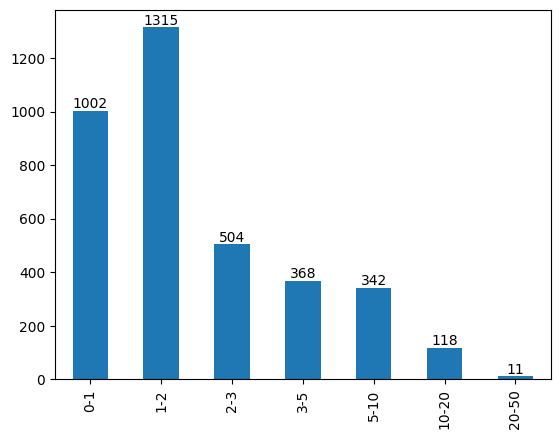

In [227]:
bins = [0,1,2,3,5,10,20,50]
bin_label = ['0-1','1-2','2-3','3-5','5-10','10-20','20-50']
pricebins = pd.cut(df['price'], bins=bins, labels=bin_label, right=False).value_counts().sort_index()
ax = pricebins.plot(kind='bar')
for i, v in enumerate(pricebins):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

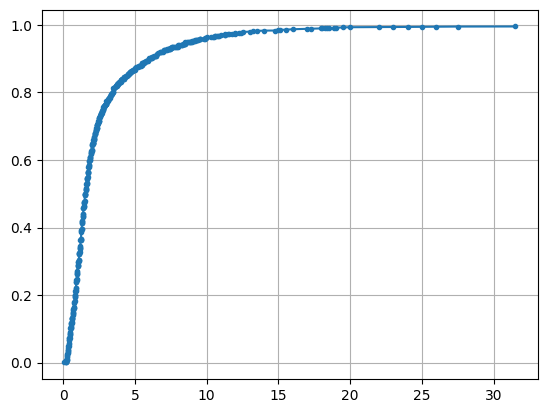

In [228]:
# ecdf
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='-')
plt.grid()

This being right skewed data. We should try logarithmic transformation to it.
Evaluate after applying log

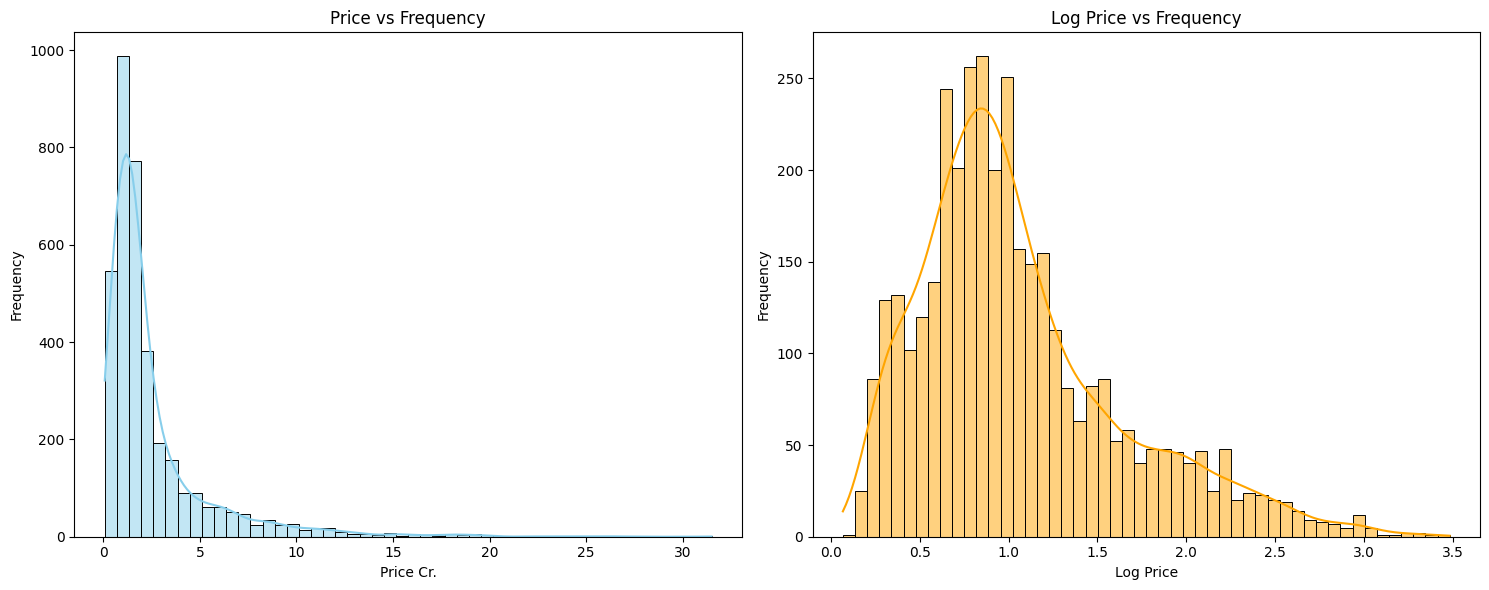

In [229]:
plt.figure(figsize=(15,6))

# price distribution default
plt.subplot(1,2,1)
sns.histplot(df['price'], bins=50, kde=True, color='skyblue') 
plt.xlabel('Price Cr.')
plt.ylabel('Frequency')
plt.title('Price vs Frequency')

# price distribution with log applied
plt.subplot(1,2,2)
# min price is above 0 (0.070) hence normal log can be applied 
sns.histplot(np.log1p(df['price']), bins=50, kde=True, color='orange') 
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.title('Log Price vs Frequency')

plt.tight_layout()
plt.show()

In [230]:
# print("Skewness : ", np.log(df['price']).skew(), "\nKurtosis : ", np.log(df['price']).kurtosis())
print("Skewness : ", np.log1p(df['price']).skew(), "\nKurtosis : ", np.log1p(df['price']).kurtosis())

Skewness :  1.0740709565255315 
Kurtosis :  0.9646692415449296


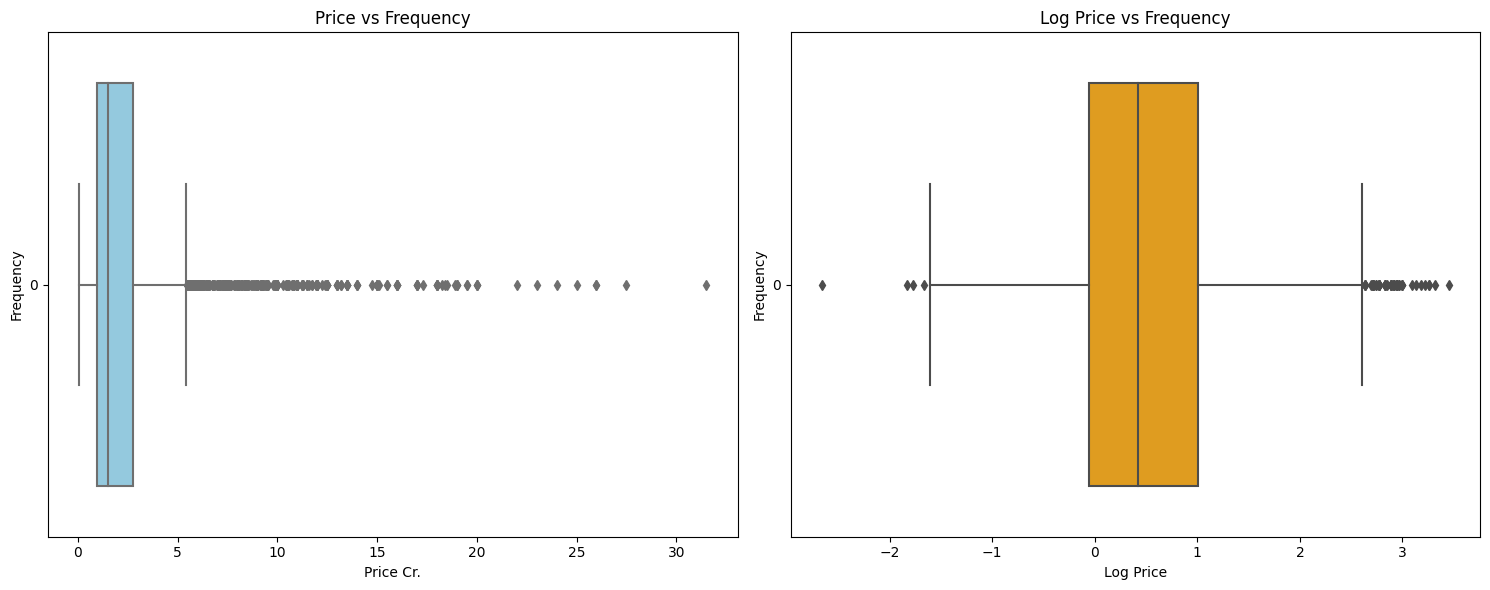

In [231]:
plt.figure(figsize=(15,6))

# price distribution default
plt.subplot(1,2,1)
sns.boxplot(df['price'], color='skyblue', orient='h') 
plt.xlabel('Price Cr.')
plt.ylabel('Frequency')
plt.title('Price vs Frequency')

# price distribution with log applied
plt.subplot(1,2,2)
# min price is above 0 (0.070) hence normal log can be applied 
sns.boxplot(np.log(df['price']), color='orange', orient='h') 
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.title('Log Price vs Frequency')

plt.tight_layout()
plt.show()

Lower Bound =  -0.3130603285343406 Cr. 
Upper Bound =  2.3026455410923155 Cr.
(156,)
count    156.000000
mean      13.266154
std        4.173479
min        9.010000
25%       10.450000
50%       11.975000
75%       15.000000
max       31.500000
Name: price, dtype: float64


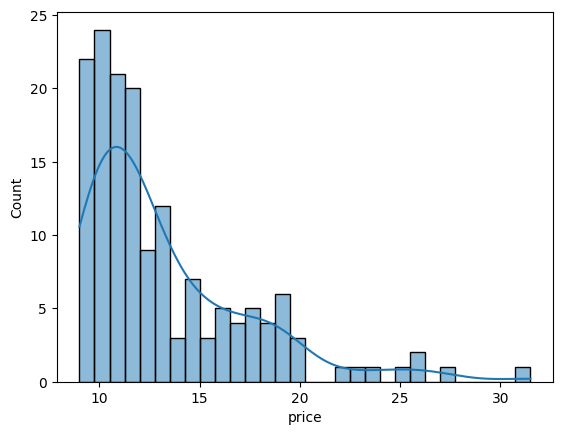

In [232]:
price = np.log1p(df['price'])
IQR = price.describe()['75%'] - price.describe()['25%']
lower_bound = price.describe()['25%'] - 1.5*IQR
upper_bound = price.describe()['75%'] + 1.5*IQR
print("Lower Bound = ",lower_bound,"Cr.", "\nUpper Bound = ", upper_bound,"Cr.")

outliers = df[price > upper_bound]['price']
print(outliers.shape)
print(outliers.describe())
sns.histplot(x=outliers, bins=30, kde=True)
plt.show()

price_per_sqft

In [233]:
df['price_per_sqft'].isnull().sum()

17

In [234]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

<AxesSubplot: xlabel='price_per_sqft', ylabel='Count'>

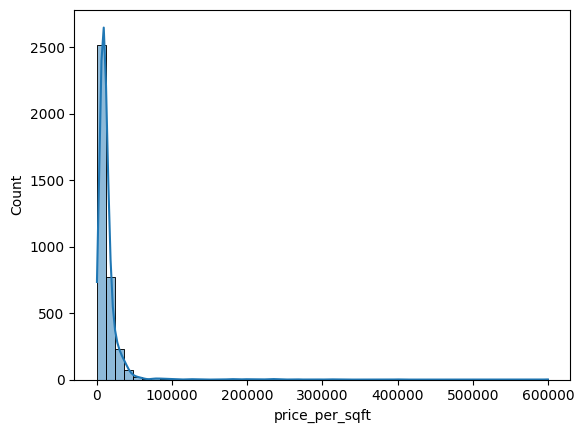

In [235]:
sns.histplot(df['price_per_sqft'], bins=50, kde=True)

<AxesSubplot: >

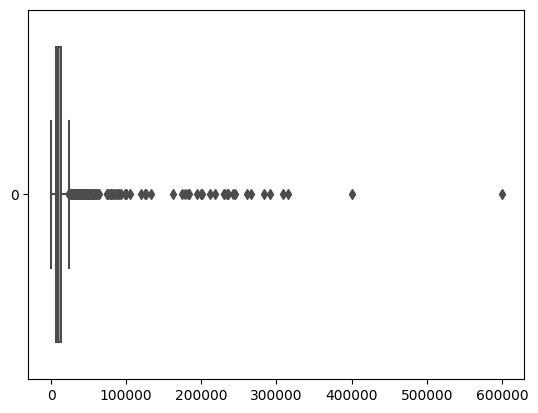

In [236]:
sns.boxplot(df['price_per_sqft'], color='orange', orient='h')

In [237]:
print("Skewness : ", df['price_per_sqft'].skew(), "\nKurtosis : ", df['price_per_sqft'].kurtosis())

Skewness :  11.4371904262371 
Kurtosis :  186.9280132353288


Observations:
1. Too many outliers 
2. Right skewed (Skewness :  11.44 )
3. 17 Missing values
4. IQR is relatively compact

bedRoom

In [238]:
df['bedRoom'].isnull().sum()

0

<AxesSubplot: >

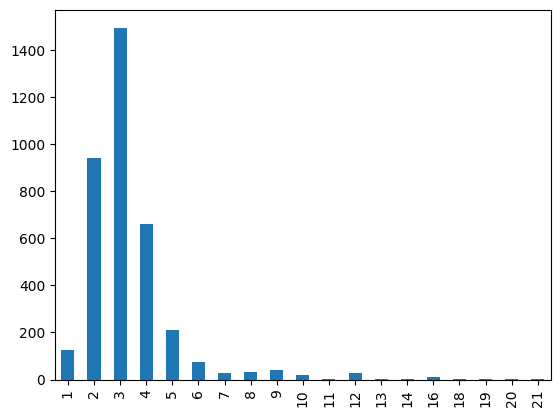

In [239]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

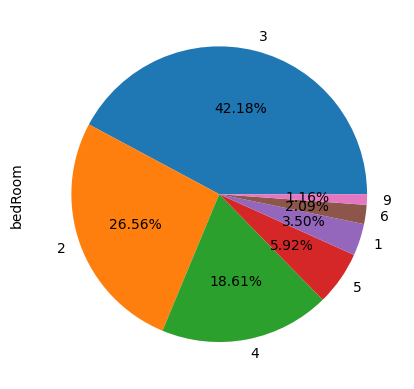

In [240]:
df['bedRoom'].value_counts(normalize=True).head(7).plot(kind='pie', autopct='%0.2f%%')
plt.show()

bathroom

0


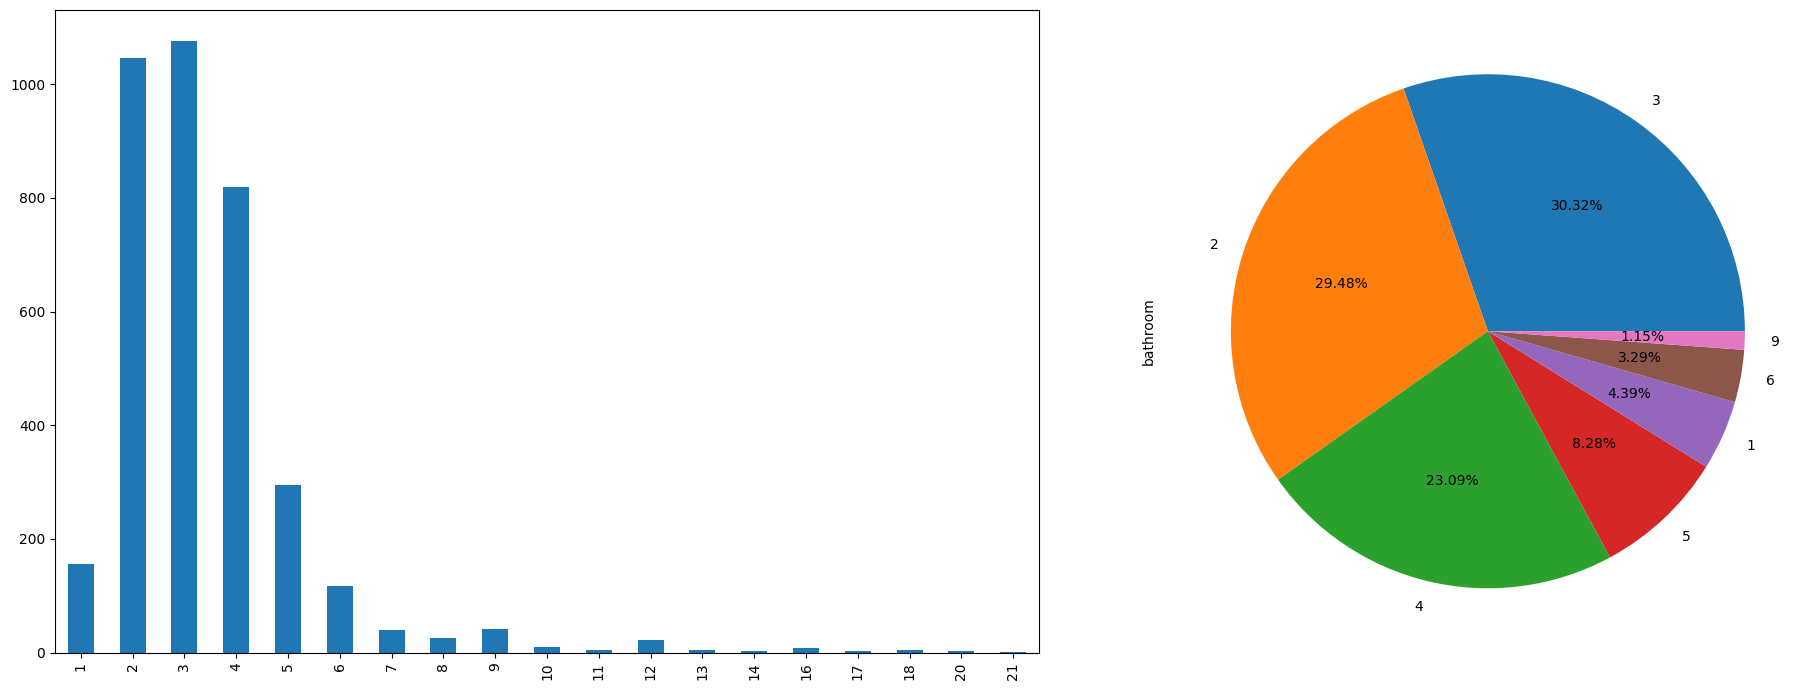

In [241]:
print(df['bathroom'].isnull().sum())

plt.figure(figsize = (20,7))

plt.subplot(1,2,1)
df['bathroom'].value_counts().sort_index().plot(kind='bar')

plt.subplot(1,2,2)
df['bathroom'].value_counts(normalize=True).head(7).plot(kind='pie', autopct='%0.2f%%')
plt.tight_layout()
plt.show()

balcony

0


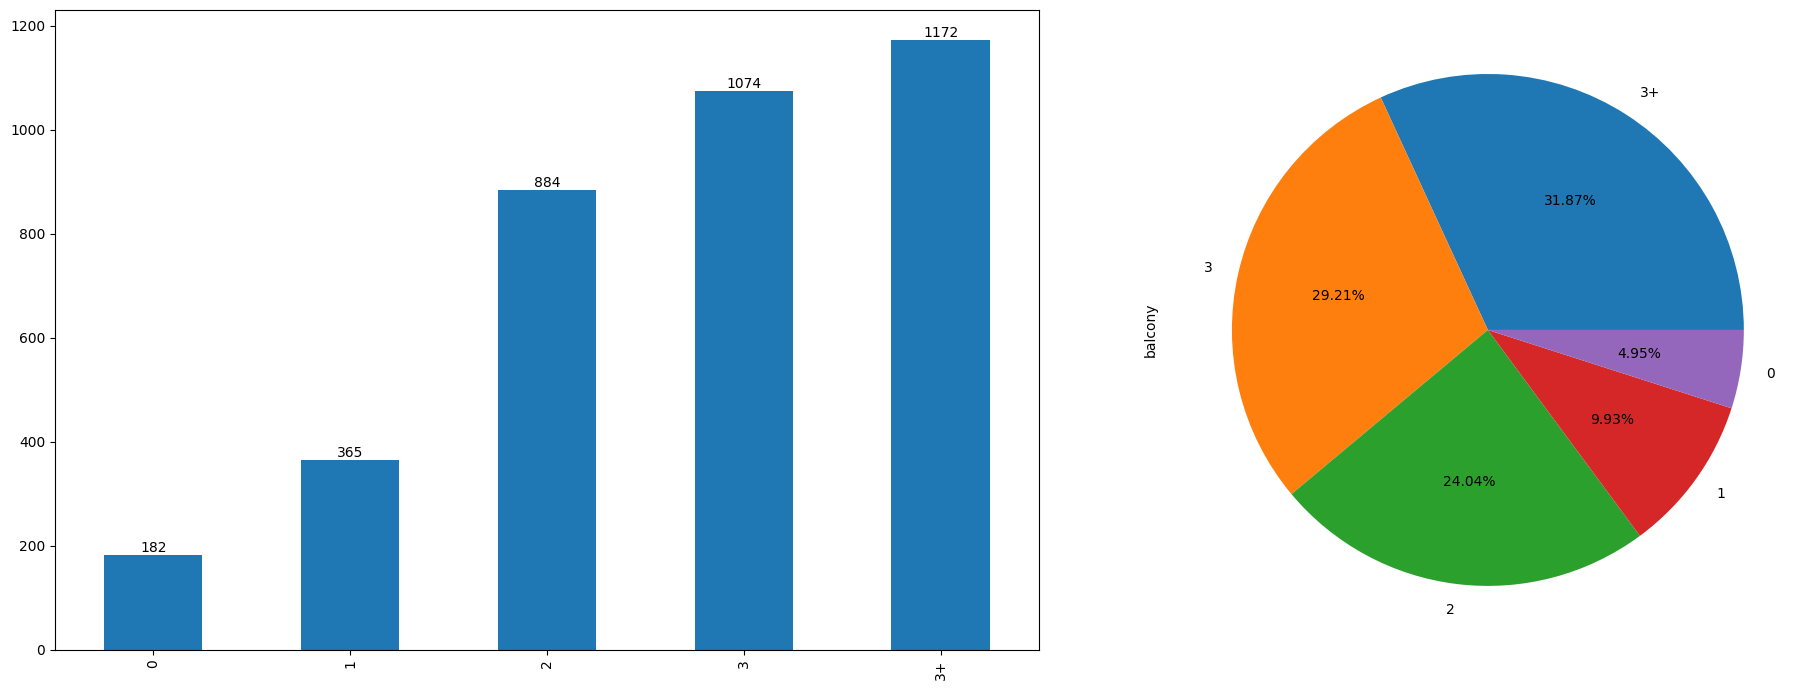

In [242]:
print(df['balcony'].isnull().sum())

plt.figure(figsize = (20,7))

plt.subplot(1,2,1)
ax = df['balcony'].value_counts().sort_index().plot(kind='bar')
for index, value in enumerate(df['balcony'].value_counts().sort_index()):
    ax.text(index, value, str(value), ha='center', va='bottom' )

plt.subplot(1,2,2)
df['balcony'].value_counts(normalize=True).plot(kind='pie', autopct='%0.2f%%')
plt.tight_layout()
plt.show()

In [243]:
df.iloc[:,8:].head()

,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


floorNum

19
count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64


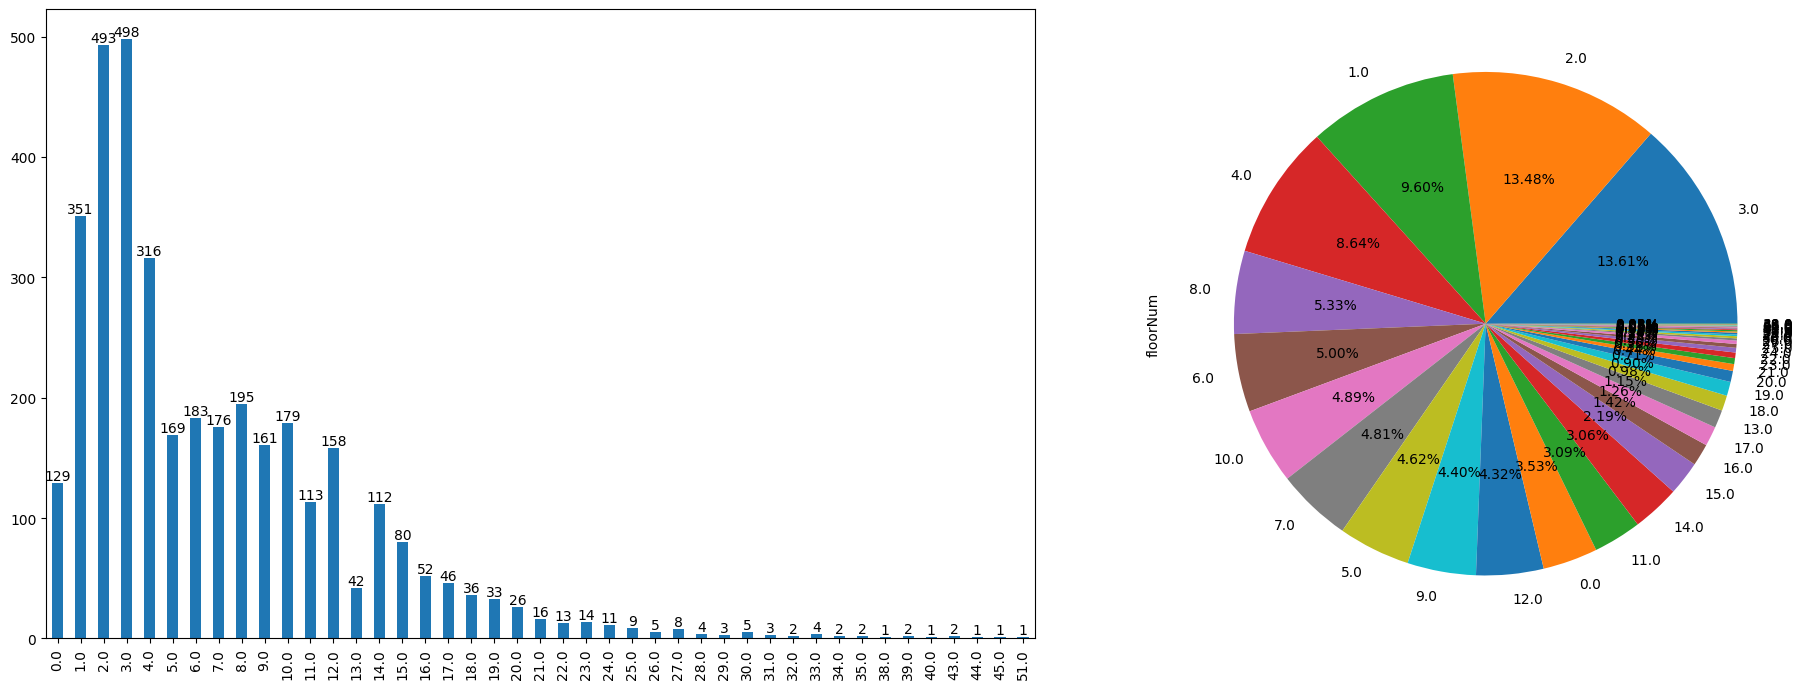

In [244]:
print(df['floorNum'].isnull().sum())

print(df['floorNum'].describe())

plt.figure(figsize = (20,7))

plt.subplot(1,2,1)
ax = df['floorNum'].value_counts().sort_index().plot(kind='bar')
for index, value in enumerate(df['floorNum'].value_counts().sort_index()):
    ax.text(index, value, str(value), ha='center', va='bottom' )

plt.subplot(1,2,2)
df['floorNum'].value_counts(normalize=True).plot(kind='pie', autopct='%0.2f%%')
plt.tight_layout()
plt.show()


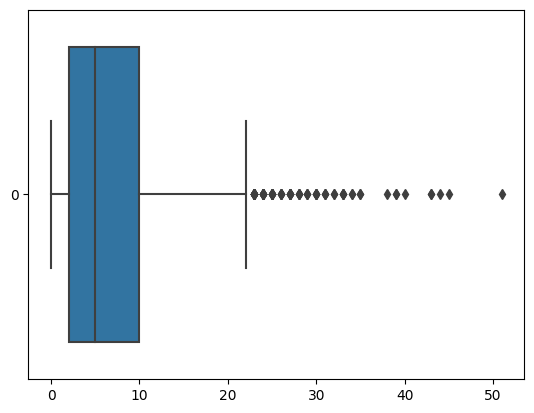

In [245]:
sns.boxplot(df['floorNum'], orient='h')
plt.show()

Observations:
1. Majority of the properties lies between 0-25 floor
2. 1-4 particularly common
3. Some are on higher floorrs but less frequently
4. Majority are upto 10 floor. IQR 3-10 floor
5. Outliers on higher sides 

facing

In [246]:
df['facing'].isnull().sum()

1045

In [247]:
df['facing'].fillna('NA', inplace=True)
df['facing'].value_counts()

NA            1045
North-East     623
East           623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: facing, dtype: int64

In [248]:
# agePossession

print(df['agePossession'].isna().sum())
df['agePossession'].value_counts()

0


Relatively New        1646
New Property           593
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     266
Name: agePossession, dtype: int64

In [249]:
# agePossession

print(df['agePossession'].isna().sum())
df['agePossession'].value_counts()

0


Relatively New        1646
New Property           593
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     266
Name: agePossession, dtype: int64

In [250]:
# super_built_up_area
# built_up_area
# carpet_area
print('Total Records = ', df.shape[0])
print('Null Value Count = ', df['super_built_up_area'].isnull().sum())
print(df['super_built_up_area'].describe())

Total Records =  3677
Null Value Count =  1802
count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64


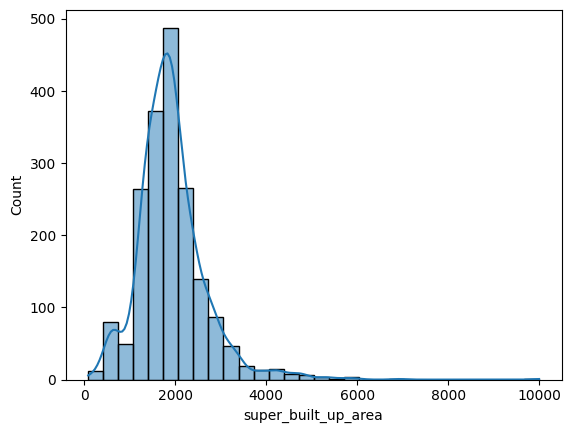

In [251]:
sns.histplot(df['super_built_up_area'].dropna(), bins=30, kde=True)
plt.show()

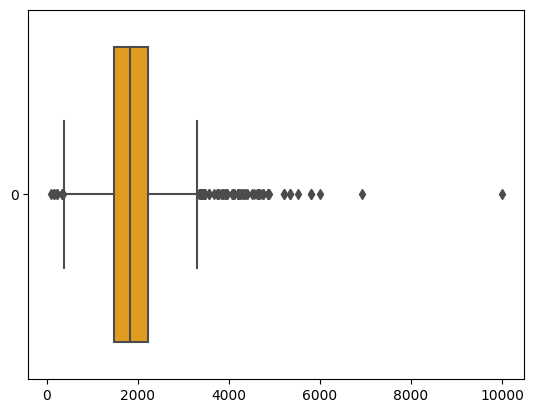

In [252]:
sns.boxplot(df['super_built_up_area'].dropna(), color='orange', orient='h')
plt.show()

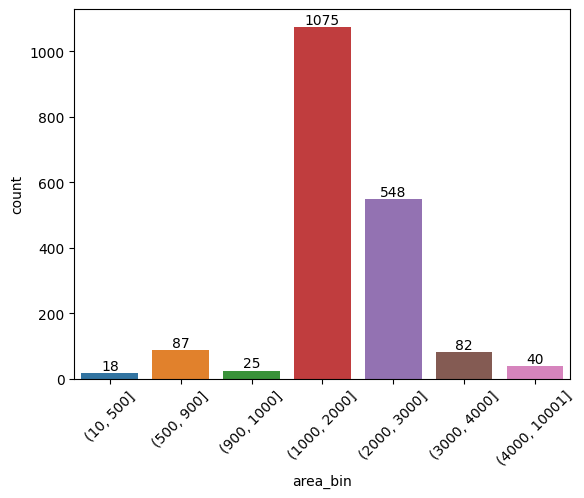

In [253]:
# Create bins encompassing min and max values
bins = [10, 500, 900, 1000, 2000, 3000, 4000, 10001]

# Create a new column with bin labels
df['area_bin'] = pd.cut(df['super_built_up_area'], bins=bins)
# Create a count plot
sns.countplot(x='area_bin', data=df)
# Add value counts on the bars
for index, val in enumerate(df['area_bin'].value_counts().sort_index()):
    plt.text(index, val, str(val), ha='center', va='bottom')
plt.xticks(rotation=45)

df.drop(['area_bin'], axis=1, inplace=True)
plt.show()


Observations:
1. Total null values = 1802
2. Median = 1828 is better representation pf data. Mean = 1925.237627, 
3. Right skewed data with about 40 outliers. Some 20 points are especially outliers. 
4. Some outliers in terms of area and price could be independent houses. Need to evaluate that.
5. IQR 1479.50 to 2215.00
6. Lower side values with flat size less than 500 SQ Ft loks like a unit convesrion issue. recheck that.

In [254]:
# built_up_area
# carpet_area
print('Total Records = ', df.shape[0])
print('Null Value Count = ', df['built_up_area'].isnull().sum())
print(df['built_up_area'].describe())

Total Records =  3677
Null Value Count =  1987
count      1690.000000
mean       2379.585816
std       17942.880237
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64


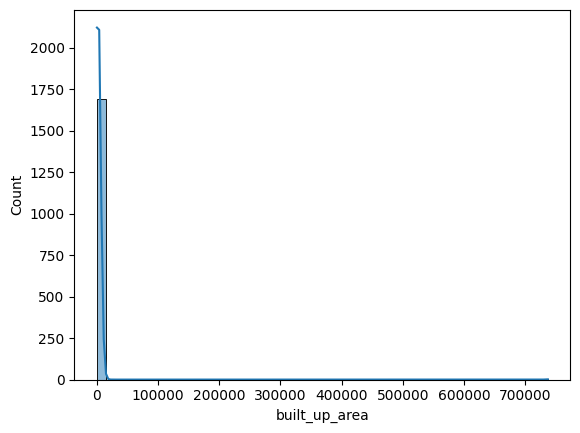

In [255]:
sns.histplot(df['built_up_area'], bins=50, kde=True)
plt.show()

In [256]:
# sns.boxplot(df['built_up_area'].dropna(), color='orange', orient='h')
# plt.show()

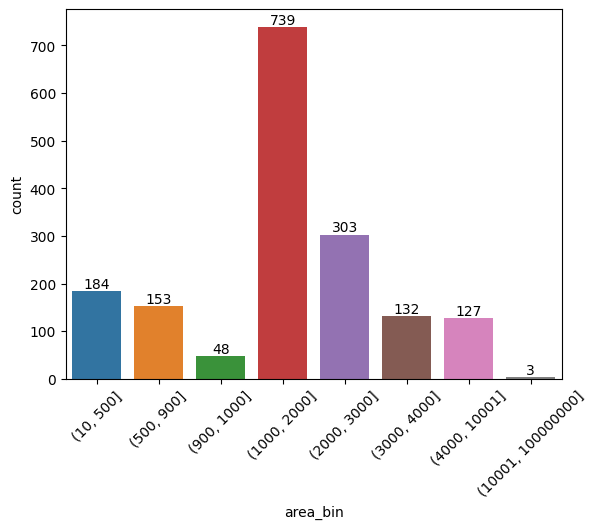

In [257]:
# Create bins encompassing min and max values
bins = [10, 500, 900, 1000, 2000, 3000, 4000, 10001, 100000000]

# Create a new column with bin labels
df['area_bin'] = pd.cut(df['built_up_area'], bins=bins)
# Create a count plot
sns.countplot(x='area_bin', data=df)
# Add value counts on the bars
for index, val in enumerate(df['area_bin'].value_counts().sort_index()):
    plt.text(index, val, str(val), ha='center', va='bottom')
plt.xticks(rotation=45)

df.drop(['area_bin'], axis=1, inplace=True)
plt.show()


Observations:
1. Most values are between 500 to 3000 Sq ft
2. 3 are data errors showing too high values of the data
3. 184 values are too low and should be investigated again for correctness
4. Highly right skewed data
5. Too many outlier on the right side
6. IQR 1100 to 2400

In [258]:
# carpet_area
print('Total Records = ', df.shape[0])
print('Null Value Count = ', df['carpet_area'].isnull().sum())
print(df['carpet_area'].describe())

Total Records =  3677
Null Value Count =  1805
count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64


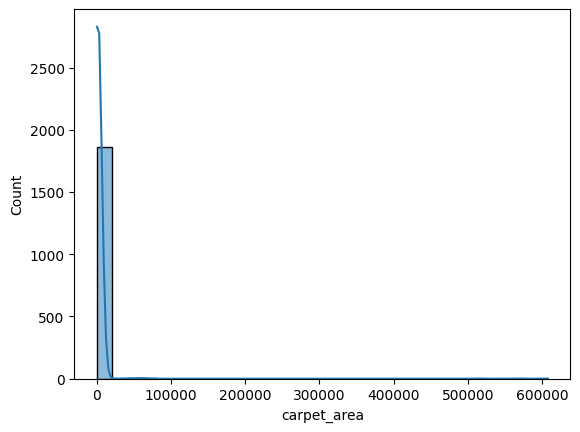

In [259]:
sns.histplot(df['carpet_area'].dropna(), bins=30, kde=True)
plt.show()

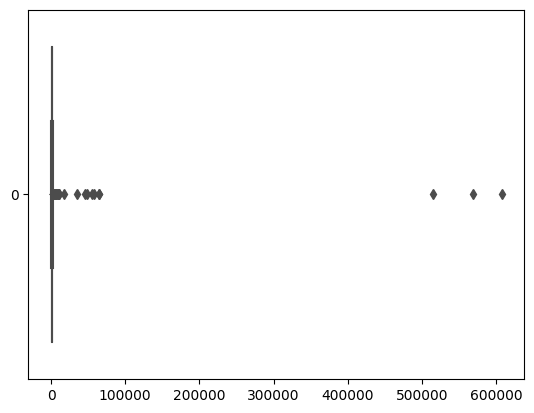

In [260]:
sns.boxplot(df['carpet_area'].dropna(), color='orange', orient='h')
plt.show()

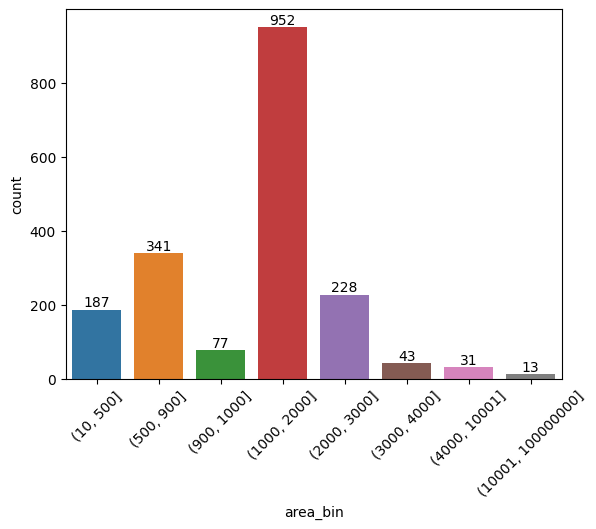

In [261]:
# Create bins encompassing min and max values
bins = [10, 500, 900, 1000, 2000, 3000, 4000, 10001, 100000000]

# Create a new column with bin labels
df['area_bin'] = pd.cut(df['carpet_area'], bins=bins)
# Create a count plot
sns.countplot(x='area_bin', data=df)
# Add value counts on the bars
for index, val in enumerate(df['area_bin'].value_counts().sort_index()):
    plt.text(index, val, str(val), ha='center', va='bottom')
plt.xticks(rotation=45)

df.drop(['area_bin'], axis=1, inplace=True)
plt.show()


Observations:
1. Most values are between 500 to 3000 Sq ft
2. 13 are data errors showing too high values of the data
3. 187 values are too low and should be investigated again for correctness
4. Highly right skewed data
5. Too many outlier on the right side
6. IQR 843 to 1790

In [262]:
# check these 3 records having garbage values
df[df['carpet_area'] > 400000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1638,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,...,NaN,NaN,514396.0,0,0,0,0,0,0,44
2111,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,...,NaN,NaN,569243.0,0,0,0,0,0,0,76
2651,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,...,NaN,NaN,607936.0,1,0,0,0,1,0,65


In [263]:
df.iloc[:,15:].head()

,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,650.0,0,0,0,0,0,0,8
1,1103.0,1,1,0,0,0,0,38
2,58141.0,0,0,0,0,0,0,15
3,585.0,0,0,0,0,0,0,49
4,1476.0,0,1,0,0,1,1,174


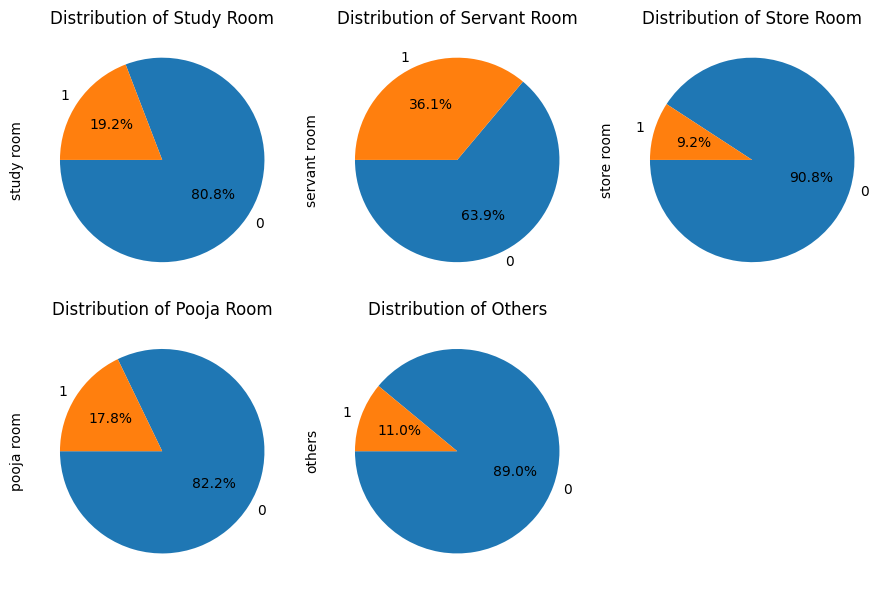

In [264]:
room_type = ['study room', 'servant room', 'store room', 'pooja room', 'others']

plt.figure(figsize=(9,6))

for index, room in enumerate(room_type, 1):
    # print(index, " : ", room)
    ax = plt.subplot(2,3,index)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=180, ax=ax)
    plt.title(f"Distribution of {room.title()}")

plt.tight_layout()
plt.show()

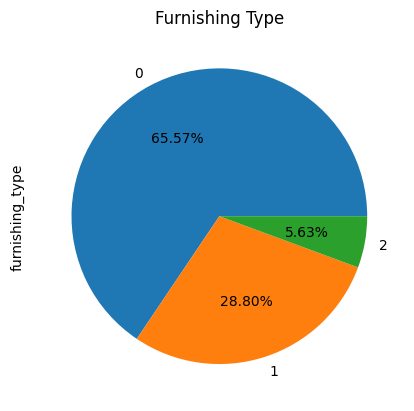

In [265]:
df['furnishing_type'].value_counts().plot(kind='pie', autopct='%0.2f%%')
plt.title('Furnishing Type')
plt.show()

Luxury Score

In [266]:
print(df['luxury_score'].isnull().sum())
df['luxury_score'].describe()

0


count    3677.000000
mean       71.512918
std        53.059082
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

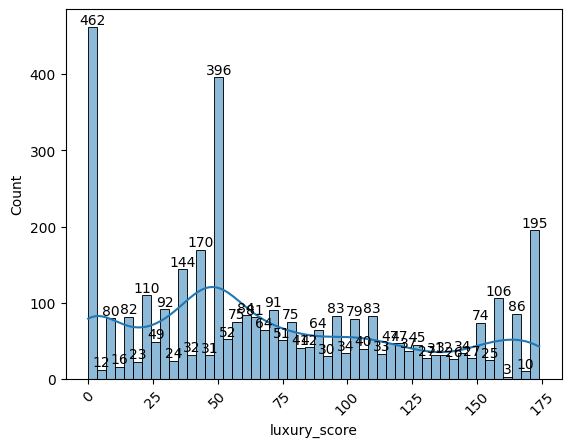

In [267]:
bin = 50
sns.histplot(df['luxury_score'], bins=bin, kde=True)

# Use numpy to find position and value of the counts used in the histogram calculations
hist = np.histogram(df['luxury_score'], bins=bin)

for ind, val in enumerate(hist[0]):
    pos = (hist[1][ind+1] + hist[1][ind])  / 2
    plt.text(pos, val, str(val), ha='center', va='bottom')
plt.xticks(rotation=45)

plt.show()

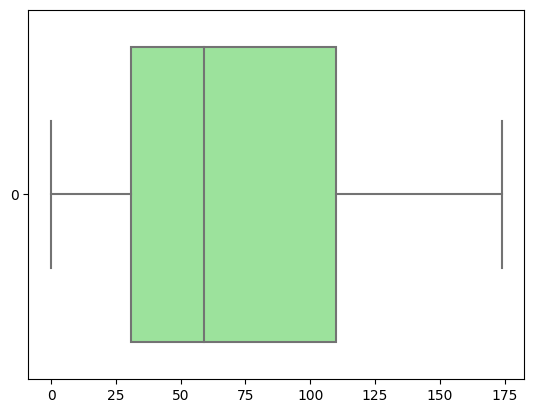

In [268]:
sns.boxplot(df['luxury_score'], color='lightgreen', orient='h')
plt.show()

Observations:
1. No outluers
2. Multimodal distribution (dual)

Overall Observations:

1. Missing values are a lot
2. Outliers need to be handled
3. 